Generation :  0
[7.60032107e-08 7.91184070e-08 7.86235321e-08 7.86185652e-08
 7.86012818e-08 7.92103527e-08 7.95126351e-08 7.96076348e-08
 7.95685552e-08 7.91579047e-08 7.93741326e-08 7.93041421e-08
 7.91609098e-08 7.93008319e-08 7.97099915e-08 7.92360006e-08
 7.93210297e-08 7.92420398e-08 7.93840724e-08 7.92918851e-08]
Best result :  -399999999996.0
Generation :  1
[8.54382266e-08 8.28554295e-08 8.16555925e-08 8.15732767e-08
 8.23567628e-08 8.19424772e-08 8.13803263e-08 8.15775857e-08
 8.20142211e-08 8.18027450e-08 8.14620060e-08 8.15862736e-08
 8.18868035e-08 8.17389052e-08 8.14911464e-08 8.15827844e-08
 8.18118609e-08 8.16991007e-08 8.15059164e-08 8.15785864e-08]
Best result :  -399999999996.0
Generation :  2
[8.54382266e-08 8.28554295e-08 8.37338554e-08 8.41772177e-08
 8.44315555e-08 8.37398443e-08 8.39879427e-08 8.41727370e-08
 8.43151085e-08 8.39137123e-08 8.40580752e-08 8.41771177e-08
 8.42792592e-08 8.39914364e-08 8.40903261e-08 8.41759186e-08
 8.42530108e-08 8.40343237e-08 8.4

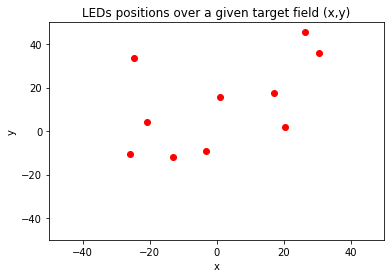

In [6]:
import numpy
import matplotlib.pyplot as plt


# Number of the variables  we are looking to optimize. for each LED is x,y
N_LED = 10 #number of LEDs
num_weights = N_LED *2  #number od genes, 2 genes per LED
sol_per_pop = 20 #number of chromosome
num_generations = 10 #number of interactions
num_parents_mating = 4 #number for parent mating 



# Defining the population size.
pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.
#Creating the initial population with a radnom (x,y)locations
new_population = numpy.random.uniform(low=-50.0, high=50.0, size=pop_size)


# Defining the target plane size
# list of coordinates in target plane (xp,yp,z_distance)
x_numpy = numpy.linspace(-50,50,30)
y_numpy = numpy.linspace(-50,50,30)
xplist = []
yplist = []

#Saving x coordinates in xplist, y coordinates in yplist
for x in x_numpy:
  for y in y_numpy:
    xplist.append(x)
    yplist.append(y)



# For each interactions:Calculating a fitness value for each gene in chromosome,
# mating a two chromosomes,crossover and mating,
# Saving gene with the best fitness for futher calculation.
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measing the fitness of each chromosome in the population.
    fitness = cal_pop_fitness(new_population,sol_per_pop,xplist,yplist)
    print(fitness)

    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(new_population, fitness, 
                                      num_parents_mating)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], num_weights))

    # Adding some variations to the offsrping using mutation.
    offspring_mutation = mutation(offspring_crossover)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

    # The best result in the current iteration.
    print("Best result : ", numpy.max(numpy.sum(fitness)))

# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(new_population,sol_per_pop,xplist,yplist)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])

print("Best solution fitness : ", fitness[best_match_idx])

#Getting coordinates of LEDs for plotting
coor = new_population[best_match_idx, :]
listt = coor[0,0,:]  #coordinates are saved in list in the order [x1 y1 x2 y2... ....xn yn]
print(listt) 
x = []
y = []
for item in range(len(listt)):
  if item%2 == 0:
    x.append(listt[item])
  else:
    y.append(listt[item]) 


#plot a positions of LEDs
plt.title("LEDs positions over a given target field (x,y)")
plt.plot(x, y, 'ro')
plt.xlim([-50, 50])
plt.ylim([-50, 50])
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [0]:
############# Genetic Algorithm  module ####################

import numpy
import statistics

def cal_pop_fitness(new_population,sol_per_pop,xplist,yplist):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function caulcuates the sum of products between each input and its corresponding weight.
    
    
    #constants for E formula:
    z_distance = 100    #distance between LED array and target plane
    m=1                 
    I_avarage=I0=0.8    #I0-radiant intensity, I_avarage - avarage radiant intensity 
    N=10                #number of LEDs
    w1=5               
    w2=0.5
    w3=0.1
    
    intensity_point = [] #list for saving E for each diode at point Xp,Yp
    inten_sum_point = [] #list E for point xp,yp for n diodies in LED array
    fitness = []         #list for fitness value of genes
    


    #getting (x,y) coordinates of LEDs array
    for i in range(sol_per_pop):
      individual = new_population[i,:]   #take a chromosome and save to the list
      xlist = []                         #empty list for x coordinate
      ylist = []                         #empty list for y coordinate
      for item in range(len(individual)):
        if item%2 == 0:
          xlist.append(new_population[i,item])
        else:
          ylist.append(new_population[i,item]) 
      
      
      #getting E for each point
      for xp,yp in zip(xplist,yplist):
        intensity_point = []                             #empty list for E of each diode at (xp,yp, z_distance)point
        for x,y in zip(xlist,ylist):
          E_point = ((z_distance**2)*I0) / (((xp-x)**2) + ((yp-y)**2) + (z_distance**2))**2
          intensity_point.append(E_point)                 
        inten_sum_point.append(sum(intensity_point))     #saves sum of E for each point, length of the list has to be the same lenght as xplist and yplist
         
      
      E_avarage = (sum(inten_sum_point)) / (len(inten_sum_point)) #avarage intensity    
      stand_dev = statistics.pstdev(inten_sum_point)              #standard deviation
      modul2 = (1 / E_avarage) * ((z_distance**2) / I_avarage)    
      CV_RMSE = stand_dev / E_avarage
      merit = w1*CV_RMSE + w2 * modul2 + w3*N   #merit function      
      fit = 1 / (1 + merit)                     #fitness function that we want to max
      
      fitness.append(fit)                       #list of fitness value
   
    return numpy.array(fitness)

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(fitness == numpy.max(fitness))
        
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents

def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually it is at the center.
    crossover_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover):
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        random_value = numpy.random.uniform(-1.0, 1.0, 1)
        offspring_crossover[idx, 4] = offspring_crossover[idx, 4] + random_value
    return offspring_crossover

1.Max E : 0.00033169953088724164 (Watt per m2)
2.Min E: 0.00020964434299739664 (Watt per m2) 
3.E min/E max: 0.632030869735126
4.E_avarage: 0.0002889689457128307
5.Uniformity of E , u = Emin/Evarage, (the best is when u>0.8): 0.7254909086519468
900
10
10
10
900
900


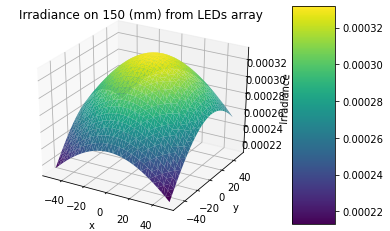

In [21]:
########### Plotting  ###################
import numpy
import matplotlib.pyplot as plt


#constants  and list for E 
z_distance = 150
m=1
I_avarage=I0=0.8
w1=5
w2=0.5
w3=0.1   
intensity_point = [] 
inten_sum_point = [] 
fitness = []

# Gettting a points for target plane (xp,yp)
x_numpy = numpy.linspace(-50,50,30)
y_numpy = numpy.linspace(-50,50,30)
xplist = []
yplist = []

for x in x_numpy:
  for y in y_numpy:
    xplist.append(x)
    yplist.append(y)

#Getting optimized LEDs positions from GA module
xlist = []
ylist = []
for item in range(len(listt)):
  if item%2 == 0:
    xlist.append(listt[item])
  else:
    ylist.append(listt[item]) 

for xp,yp in zip(xplist,yplist):
  intensity_point = []
  for x,y in zip(xlist,ylist):    
    E_point = ((z_distance**2)*I0) / (((xp-x)**2) + ((yp-y)**2) + (z_distance**2))**2
    intensity_point.append(E_point) 
  inten_sum_point.append(sum(intensity_point)) 

# uniformity illuminace u , has to be u = Emin / Eavarage = 1 or u > 0.8

minim = min(inten_sum_point)
maxx = max(inten_sum_point)
print(f"1.Max E : {maxx} (Watt per m2)")
print (f"2.Min E: {minim} (Watt per m2) ")
omjer = minim / maxx
print("3.E min/E max:", omjer)
E_avarage = (sum(inten_sum_point)) / (len(inten_sum_point))
print ("4.E_avarage:" , E_avarage)
u = minim / E_avarage            
print("5.Uniformity of E , u = Emin/Evarage, (the best is when u>0.8):", u)


print(len(inten_sum_point))
print(len(intensity_point))
print(len(xlist))
print(len(ylist))
print(len(xplist))
print(len(yplist))


%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.axes.set_title(f"Irradiance on {z_distance} (mm) from LEDs array")
ax.axes.set_xlabel("x")
ax.axes.set_ylabel("y")
ax.axes.set_zlabel("Irradiance")

surf = ax.plot_trisurf(xplist, yplist, inten_sum_point,
                cmap='viridis', edgecolor='none');
fig.colorbar(surf, shrink=1, aspect=5)
plt.show()

